# 查看Pipeline支持的任务类型

In [1]:
from transformers.pipelines import SUPPORTED_TASKS

/opt/miniconda3/envs/transformers/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print(SUPPORTED_TASKS.items())

dict_items([('audio-classification', {'impl': <class 'transformers.pipelines.audio_classification.AudioClassificationPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForAudioClassification'>,), 'default': {'model': {'pt': ('superb/wav2vec2-base-superb-ks', '372e048')}}, 'type': 'audio'}), ('automatic-speech-recognition', {'impl': <class 'transformers.pipelines.automatic_speech_recognition.AutomaticSpeechRecognitionPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForCTC'>, <class 'transformers.models.auto.modeling_auto.AutoModelForSpeechSeq2Seq'>), 'default': {'model': {'pt': ('facebook/wav2vec2-base-960h', '55bb623')}}, 'type': 'multimodal'}), ('text-to-audio', {'impl': <class 'transformers.pipelines.text_to_audio.TextToAudioPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForTextToWaveform'>, <class 'transformers.models.auto.modeling_auto.AutoModelForTextToSpectrogram'>), 'defau

In [3]:
for k, v in SUPPORTED_TASKS.items():
    print(k, v)

audio-classification {'impl': <class 'transformers.pipelines.audio_classification.AudioClassificationPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForAudioClassification'>,), 'default': {'model': {'pt': ('superb/wav2vec2-base-superb-ks', '372e048')}}, 'type': 'audio'}
automatic-speech-recognition {'impl': <class 'transformers.pipelines.automatic_speech_recognition.AutomaticSpeechRecognitionPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForCTC'>, <class 'transformers.models.auto.modeling_auto.AutoModelForSpeechSeq2Seq'>), 'default': {'model': {'pt': ('facebook/wav2vec2-base-960h', '55bb623')}}, 'type': 'multimodal'}
text-to-audio {'impl': <class 'transformers.pipelines.text_to_audio.TextToAudioPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForTextToWaveform'>, <class 'transformers.models.auto.modeling_auto.AutoModelForTextToSpectrogram'>), 'default': {'model': {'pt': ('suno

# Pipeline的创建与使用方式

In [4]:
from transformers import pipeline

## 根据任务类型直接创建Pipeline, 默认都是英文的模型

In [5]:
pipe = pipeline("text-classification")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/opt/miniconda3/envs/transformers/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [6]:
pipe(["very good!", "vary bad!"])

[{'label': 'POSITIVE', 'score': 0.9998525381088257},
 {'label': 'NEGATIVE', 'score': 0.9991207718849182}]

## 指定任务类型，再指定模型，创建基于指定模型的Pipeline

In [7]:
# https://huggingface.co/models
pipe = pipeline("text-classification", model="uer/roberta-base-finetuned-dianping-chinese")

In [8]:
pipe("我觉得不太行！")

[{'label': 'negative (stars 1, 2 and 3)', 'score': 0.9735506772994995}]

## 预先加载模型，再创建Pipeline

In [9]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# 这种方式，必须同时指定model和tokenizer
model = AutoModelForSequenceClassification.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")
tokenizer = AutoTokenizer.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")
pipe = pipeline("text-classification", model=model, tokenizer=tokenizer)

In [10]:
pipe("我觉得不太行！")

[{'label': 'negative (stars 1, 2 and 3)', 'score': 0.9735506772994995}]

In [11]:
pipe.model.device

device(type='cpu')

In [12]:
# import torch
# import time
# times = []
# for i in range(100):
#     torch.cuda.synchronize()
#     start = time.time()
#     pipe("我觉得不太行！")
#     torch.cuda.synchronize()
#     end = time.time()
#     times.append(end - start)
# print(sum(times) / 100)

import torch
import time
from transformers import pipeline

# 初始化pipeline，假设你使用的是text-classification模型
#pipe = pipeline("text-classification", model="distilbert-base-uncased-finetuned-sst-2-english")

# 确定设备
device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")
print(device)

times = []
for i in range(100):
    # 在每次运行前同步设备
    if device.type == "mps":
        torch.mps.synchronize()
    start = time.time()
    result = pipe("我觉得不太行！")
    if device.type == "mps":
        torch.mps.synchronize()
    end = time.time()
    times.append(end - start)

print(sum(times) / 100)

mps
0.03497127771377564


## 使用GPU进行推理

In [13]:
pipe = pipeline("text-classification", model="uer/roberta-base-finetuned-dianping-chinese", device=0)

In [14]:
pipe.model.device

device(type='mps', index=0)

In [15]:
import torch
import time
times = []
for i in range(100):
    if device.type == "mps":
        torch.mps.synchronize()
    start = time.time()
    pipe("我觉得不太行！")
    if device.type == "mps":
        torch.mps.synchronize()
    end = time.time()
    times.append(end - start)
print(sum(times) / 100)



0.008992636203765869


## 确定Pipeline参数

In [16]:
qa_pipe = pipeline("question-answering", model="uer/roberta-base-chinese-extractive-qa")

In [17]:
qa_pipe

In [18]:
# QuestionAnsweringPipeline 

In [19]:
qa_pipe(question="中国的首都是哪里？", context="中国的首都是北京", max_answer_len=1)

{'score': 0.0022874081041663885, 'start': 6, 'end': 7, 'answer': '北'}

# 其他Pipeline示例

In [20]:
checkpoint = "google/owlvit-base-patch32"
detector = pipeline(model=checkpoint, task="zero-shot-object-detection")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


In [21]:
#ZeroShotObjectDetectionPipeline 

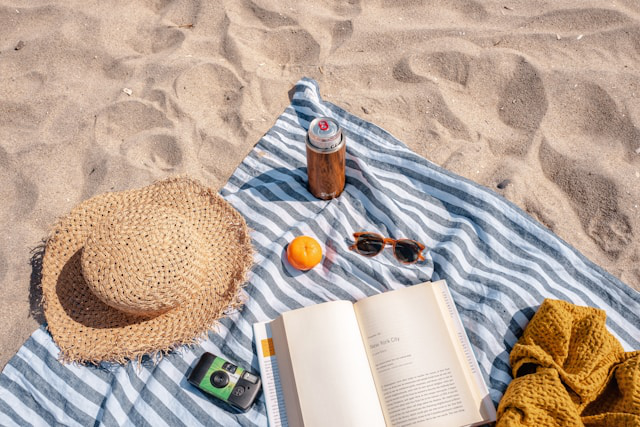

In [22]:
import requests
from PIL import Image

url = "https://unsplash.com/photos/oj0zeY2Ltk4/download?ixid=MnwxMjA3fDB8MXxzZWFyY2h8MTR8fHBpY25pY3xlbnwwfHx8fDE2Nzc0OTE1NDk&force=true&w=640"
im = Image.open(requests.get(url, stream=True).raw)
im

In [23]:
predictions = detector(
    im,
    candidate_labels=["hat", "sunglasses", "book"],
)
predictions

[{'score': 0.2786322236061096,
  'label': 'sunglasses',
  'box': {'xmin': 349, 'ymin': 228, 'xmax': 429, 'ymax': 264}},
 {'score': 0.18649257719516754,
  'label': 'book',
  'box': {'xmin': 269, 'ymin': 283, 'xmax': 502, 'ymax': 427}},
 {'score': 0.11562081426382065,
  'label': 'hat',
  'box': {'xmin': 39, 'ymin': 173, 'xmax': 260, 'ymax': 363}}]

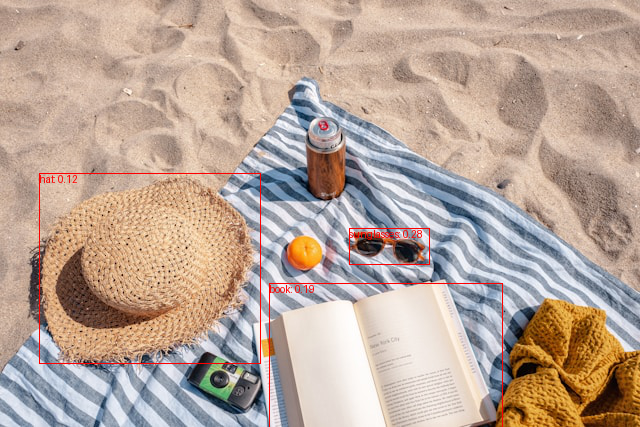

In [24]:
from PIL import ImageDraw

draw = ImageDraw.Draw(im)

for prediction in predictions:
    box = prediction["box"]
    label = prediction["label"]
    score = prediction["score"]
    xmin, ymin, xmax, ymax = box.values()
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
    draw.text((xmin, ymin), f"{label}: {round(score,2)}", fill="red")

im

# Pipeline背后的实现

In [25]:
from transformers import *
import torch

/opt/miniconda3/envs/transformers/lib/python3.9/site-packages/transformers/deepspeed.py:23: FutureWarning: transformers.deepspeed module is deprecated and will be removed in a future version. Please import deepspeed modules directly from transformers.integrations
  warnings.warn(


In [26]:
tokenizer = AutoTokenizer.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")
model = AutoModelForSequenceClassification.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")

/opt/miniconda3/envs/transformers/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
loading configuration file config.json from cache at /Users/maojj/.cache/huggingface/hub/models--uer--roberta-base-finetuned-dianping-chinese/snapshots/25faf1874b21e76db31ea9c396ccf2a0322e0071/config.json
Model config BertConfig {
  "_name_or_path": "uer/roberta-base-finetuned-dianping-chinese",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "negative (stars 1, 2 and 3)",
    "1": "positive (stars 4 and 5)"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "negative (star

In [27]:
input_text = "我觉得不太行！"
inputs = tokenizer(input_text, return_tensors="pt")
inputs

{'input_ids': tensor([[ 101, 2769, 6230, 2533,  679, 1922, 6121, 8013,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [28]:
res = model(**inputs)
res

SequenceClassifierOutput(loss=None, logits=tensor([[ 1.7376, -1.8681]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [29]:
logits = res.logits
logits = torch.softmax(logits, dim=-1)
logits

tensor([[0.9736, 0.0264]], grad_fn=<SoftmaxBackward0>)

In [30]:
pred = torch.argmax(logits).item()
pred

0

In [31]:
model.config.id2label

{0: 'negative (stars 1, 2 and 3)', 1: 'positive (stars 4 and 5)'}

In [32]:
result = model.config.id2label.get(pred)
result

'negative (stars 1, 2 and 3)'